# Machine Learning: Finding Optimal Model and Hyperparameters

# Step 0: Imports and Reading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Car details v3.csv")
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Copy Dataset

In [3]:
df = data.copy()

# Step 1: Data Understanding

In [4]:
print(f" The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

 The dataset has 8128 rows and 13 columns


In [5]:
# Statistics of numeric columns and removing scientific notation format
df.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,year,selling_price,km_driven,seats
count,8128.00000,8128.00000,8128.00000,7907.00000
mean,2013.80401,638271.80770,69819.51083,5.41672
std,4.04425,806253.40351,56550.55496,0.95959
min,1983.00000,29999.00000,1.00000,2.00000
25%,2011.00000,254999.00000,35000.00000,5.00000
50%,2015.00000,450000.00000,60000.00000,5.00000
75%,2017.00000,675000.00000,98000.00000,5.00000
max,2020.00000,10000000.00000,2360457.00000,14.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# Step 2: Data Preparation

In [8]:
#prints subset with NaN values
null_rows = df[pd.isnull(df).any(axis = 1 )]
null_rows.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [9]:
#Drops rows with null values
df = df.dropna(axis = 0)
df.shape

(7906, 13)

In [10]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [11]:
df.loc[df.duplicated()].sample(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5614,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2711000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
2912,Honda BR-V i-VTEC S MT,2017,700000,43000,Petrol,Dealer,Manual,First Owner,15.4 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,7.0
7666,Tata Sumo CX 9 Seater,2008,150000,120000,Diesel,Individual,Manual,First Owner,12.2 kmpl,1948 CC,68 bhp,"115@ 2,500(kgm@ rpm)",9.0
7593,Ford Figo 1.5D Titanium MT,2015,480000,80000,Diesel,Individual,Manual,First Owner,25.83 kmpl,1498 CC,99 bhp,215Nm@ 1750-3000rpm,5.0


In [12]:
df.loc[df.duplicated()].shape

(1189, 13)

In [13]:
#Removing duplicate rows
df= df.drop_duplicates()

In [14]:
df.shape

(6717, 13)

# Step 3: Data Pre-Processing

In [15]:
df.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', '18.9 kmpl', '18.15 kmpl',
       '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl',
       '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl',
       '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl',
       '33.44 km/kg', '23.95 kmpl', '17.0 kmpl', '20.63 kmpl',
       '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl', '12.55 kmpl',
       '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '20.65 kmpl',
       '27.3 kmpl', '11.36 kmpl', '17.68 kmpl', '14.28 kmpl',
       '18.53 kmpl', '14.84 kmpl', '21.12 kmpl', '20.36 kmpl',
       '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl', '20.51 kmpl',
       '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl', '20.54 kmpl',
       '22.77 kmpl', '15.71 kmpl', '23.1 kmpl', '19.02 kmpl',
       '19.81 kmpl', '26

In [16]:
# We want to get only the number in mileage column while converting mileage in km/kg to kmpl
Correct_Mileage = []
for i in df.mileage:
    if str(i).endswith('km/kg'):
        i = float(i.strip("km/kg"))
        i=float(i)*1.4
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i= float(i.strip("kmpl"))
        Correct_Mileage.append(i)

In [20]:
df['mileage'] = Correct_Mileage
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
df.engine.unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC',
       '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC', '2755 CC',
       '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC', '1998 CC',
       '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC', '999 CC',
       '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC', '1451 CC',
       '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC', '2362 CC',
       '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC', '1193 CC',
       '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC', '2956 CC',
       '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC', '2354 CC',
       '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC', '1997 CC',
       '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC', '2609 CC',
       '2953 CC', '1150 CC', '1994 CC', '1388 CC', '1527 CC'

In [19]:
#We want get only the number in engine column
def convertToNumber(s):
    if "CC" in s:
        return float(s.strip("CC"))
    else:
        return np.nan

#Call function    
df["engine"] = df["engine"].apply(convertToNumber)

In [21]:
df.max_power.unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp', '138.03 bhp',
       '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp',
       '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp',
       '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp',
       '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp',
       '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp',
       '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp', '81.80 bhp',
       '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp',
       '98.96 bh

In [22]:
#We want get only the number in max_power column
def convertToNumber(s):
    if "bhp" in s:
        return float(s.strip("bhp"))
    else:
        return np.nan

#Call function    
df["max_power"] = df["max_power"].apply(convertToNumber)

In [23]:
#Check if there are null values to see what our functions did.
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [24]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.578935,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.280333,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.500000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.540000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,46.816000,3604.000000,400.000000,14.000000


# Step 4: Feature Engineering

In [25]:
#Drop features with litt
df1 = df.drop(['name','seller_type', 'torque','owner'],axis = 1)
df1.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Manual,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Manual,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Manual,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Manual,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Manual,16.10,1298.0,88.20,5.0


### One Hot Encoding

In [26]:
df1_new = pd.get_dummies(df1, columns = ['fuel'], drop_first = True, dtype = int)
df1_new.head()

,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,450000,145500,Manual,23.40,1248.0,74.00,5.0,1,0,0
1,2014,370000,120000,Manual,21.14,1498.0,103.52,5.0,1,0,0
2,2006,158000,140000,Manual,17.70,1497.0,78.00,5.0,0,0,1
3,2010,225000,127000,Manual,23.00,1396.0,90.00,5.0,1,0,0
4,2007,130000,120000,Manual,16.10,1298.0,88.20,5.0,0,0,1


In [27]:
df1_new['transmission'] =df1_new['transmission'].replace({"Automatic": 1, "Manual":0})
df1_new.head(5)

,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,450000,145500,0,23.40,1248.0,74.00,5.0,1,0,0
1,2014,370000,120000,0,21.14,1498.0,103.52,5.0,1,0,0
2,2006,158000,140000,0,17.70,1497.0,78.00,5.0,0,0,1
3,2010,225000,127000,0,23.00,1396.0,90.00,5.0,1,0,0
4,2007,130000,120000,0,16.10,1298.0,88.20,5.0,0,0,1


### Feature Relationship

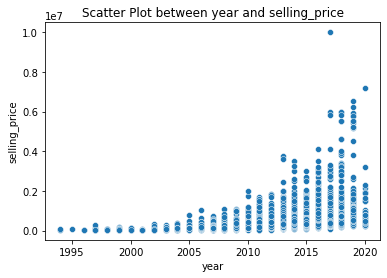

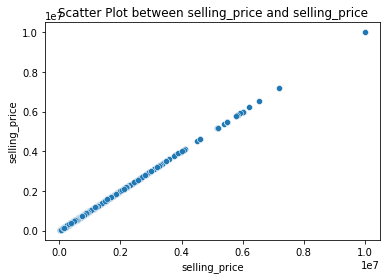

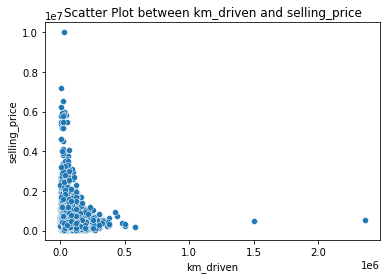

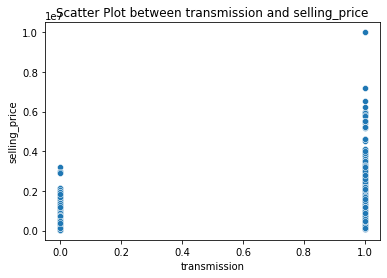

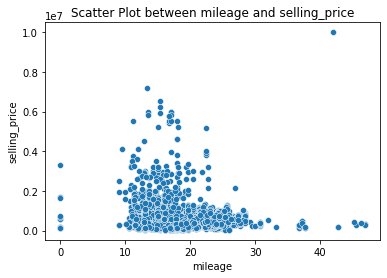

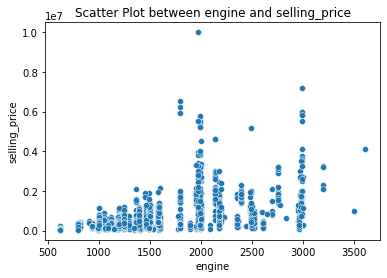

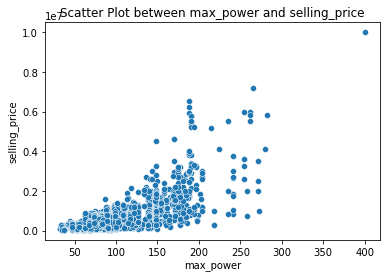

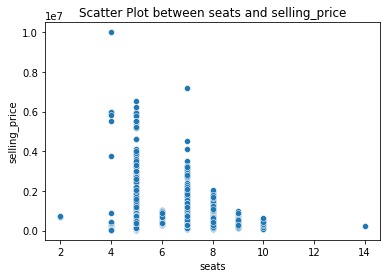

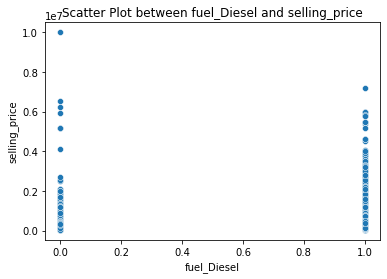

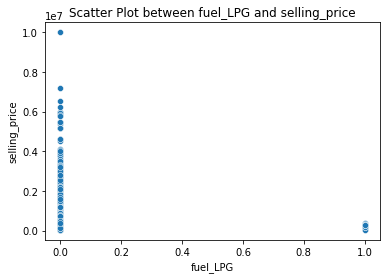

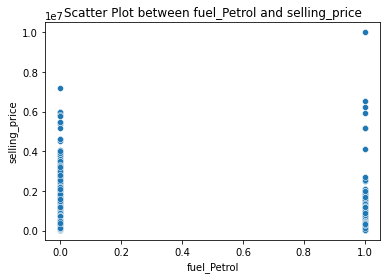

In [28]:
for column in df1_new.columns:
    sn.scatterplot(data=df1_new, x=column, y='selling_price')
    plt.title(f"Scatter Plot between {column} and selling_price")
    plt.show()

# Step 5: Outlier Removal Using Standard Deviation and Mean

### **1. Using km_driven column**

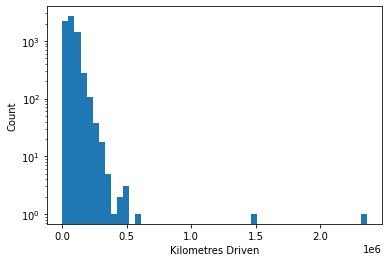

In [29]:
plt.hist(df1_new.km_driven, bins=50)
plt.xlabel("Kilometres Driven")
plt.ylabel("Count")
plt.yscale('log')

plt.show()

There appear to be anomalies in the "km_driven" column.

In [30]:
df1_new.describe().apply(lambda x: x.apply('{0:.5f}'.format))['km_driven']

count       6717.00000
mean       73398.33765
std        58703.27527
min            1.00000
25%        38000.00000
50%        68203.00000
75%       100000.00000
max      2360457.00000
Name: km_driven, dtype: object

In this analysis, we observe a range from a minimum of 1km to a maximum of 2 360 457km, indicating significant variability in kilometers driven. To mitigate outliers, it's advisable to employ the mean and standard deviation.

In [31]:
min_limit = df1_new.km_driven.mean() - 4*df1_new.km_driven.std()
max_limit = df1_new.km_driven.mean() + 4*df1_new.km_driven.std()

outliers = df1_new[ (df1_new.km_driven  < min_limit) | (df1_new.km_driven > max_limit) ]
outliers.head()

,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
998,2012,220000,360003,0,18.9,998.0,67.1,5.0,0,0,1
1629,2010,450000,334000,0,12.8,2494.0,102.0,7.0,1,0,0
1810,2012,500000,1500000,0,15.1,2179.0,140.0,7.0,1,0,0
2006,2011,650000,375000,0,12.8,2494.0,102.0,8.0,1,0,0
2272,2010,260000,380000,0,13.6,2523.0,63.0,7.0,1,0,0


In [32]:
df2_new = df1_new[ (df1_new.km_driven  > min_limit) & (df1_new.km_driven < max_limit) ]
df2_new.km_driven.describe() 

count      6700.000000
mean      72098.857910
std       45912.746508
min           1.000000
25%       37458.250000
50%       68000.000000
75%      100000.000000
max      305000.000000
Name: km_driven, dtype: float64

In [33]:
#calculates outliers removed
df1_new.shape[0]- df2_new.shape[0]

17

### **2. Using seats column**

In [34]:
 (df2_new[df2_new['seats']==float(14)])

,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
4575,2010,235000,50000,0,10.71,1948.0,90.0,14.0,1,0,0


In [35]:
df3_new = df2_new[~(df2_new.seats== float(14))]
df3_new

,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
0,2014,450000,145500,0,23.40,1248.0,74.00,5.0,1,0,0
1,2014,370000,120000,0,21.14,1498.0,103.52,5.0,1,0,0
2,2006,158000,140000,0,17.70,1497.0,78.00,5.0,0,0,1
3,2010,225000,127000,0,23.00,1396.0,90.00,5.0,1,0,0
4,2007,130000,120000,0,16.10,1298.0,88.20,5.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,0,18.90,998.0,67.10,5.0,0,0,1
8122,2014,475000,80000,0,22.54,1396.0,88.73,5.0,1,0,0
8123,2013,320000,110000,0,18.50,1197.0,82.85,5.0,0,0,1
8124,2007,135000,119000,0,16.80,1493.0,110.00,5.0,1,0,0


### **3. Using max_power column**

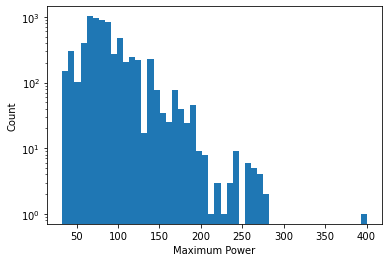

In [36]:
plt.hist(df3_new.max_power, bins=50)
plt.xlabel("Maximum Power")
plt.ylabel("Count")
plt.yscale('log')

plt.show()

In [37]:
min_threshold = df3_new.max_power.mean() - 5*df3_new.max_power.std()
max_threshold = df3_new.max_power.mean() + 5*df3_new.max_power.std()

outliers = df3_new[(df3_new.max_power  < min_threshold) | (df3_new.max_power > max_threshold) ]
outliers.head()

,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
134,2017,4100000,17000,1,9.50,3604.0,280.00,5.0,0,0,1
136,2017,6000000,37000,1,13.50,2987.0,254.79,5.0,1,0,0
148,2017,5850000,47000,1,13.50,2987.0,282.00,5.0,1,0,0
170,2017,10000000,30000,1,42.00,1969.0,400.00,4.0,0,0,1
1071,2018,6000000,28156,1,17.09,2993.0,261.40,4.0,1,0,0


In [38]:
df4_new = df3_new[ (df3_new.max_power  > min_threshold) & (df3_new.max_power < max_threshold) ]
df4_new.describe() 

,year,selling_price,km_driven,transmission,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol
count,6681.000000,6.681000e+03,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000
mean,2013.615028,5.164033e+05,72187.800030,0.083371,19.604279,1425.067056,87.216840,5.431672,0.543482,0.005239,0.443646
std,3.899252,4.711531e+05,45932.769922,0.276462,4.260921,485.822323,30.208742,0.975835,0.498143,0.072195,0.496851
min,1994.000000,2.999900e+04,1.000000,0.000000,0.000000,624.000000,32.800000,2.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.500000e+05,38000.000000,0.000000,16.800000,1197.000000,67.100000,5.000000,0.000000,0.000000,0.000000
50%,2014.000000,4.150000e+05,68089.000000,0.000000,19.620000,1248.000000,81.830000,5.000000,1.000000,0.000000,0.000000
75%,2017.000000,6.500000e+05,100000.000000,0.000000,22.540000,1498.000000,99.230000,5.000000,1.000000,0.000000,1.000000
max,2020.000000,6.523000e+06,305000.000000,1.000000,46.816000,3198.000000,241.400000,10.000000,1.000000,1.000000,1.000000


# Step 6: Build Model

In [40]:
df4_new.shape

(6681, 11)

In [41]:
X = df4_new.drop(['selling_price'],axis='columns')
y = df4_new.selling_price

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

In [43]:
len(X_train),len(y_test)

(4676, 2005)

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6441760007854929

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.8981875854300956

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [47]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=100)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.64137856, 0.59231572, 0.58372338, 0.57569508, 0.60820976])

## Use K Fold cross validation to measure accuracy of our Random Forest model

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size=0.3, random_state=100)

cross_val_score(RandomForestRegressor(), X, y, cv=cv)

array([0.91005743, 0.88920436, 0.87765706, 0.88661461, 0.87478607])

## Find best model using GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\sibiy\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\sibiy\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.611982,{'normalize': True}
1,lasso,0.611981,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.845455,"{'criterion': 'mse', 'splitter': 'random'}"


Based on above results we can say that Random Forest gives the best score with parameters, n_estimators =10 and random_state =42. 